(In order to load the stylesheet of this notebook, execute the last code cell in this notebook)

# Stack Overflow

## Introduction 

In this assignment, we will look at some posts on Stack Overflow during the year of 2015 and measure the similarity of users by looking at the types of questions they answer. We will also analyze the creation dates of questions.

## Step 0. Preparation

Before we start working on the notebook, let's make sure that everything is setup properly. You should have downloaded and installed
* [Anaconda](https://store.continuum.io/cshop/anaconda/)
* [Git](http://git-scm.com/downloads)

If you are working from the undergraduate lab (on a linux machine) these are both installed, but you need to follow the instructions [from here](https://github.com/datascience16/lectures/blob/master/Lecture2/Getting-Started.ipynb).



## Step 1. Getting the data

Let's make a sample request to retrieve the questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs).

In [2]:
import requests

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
print response

<Response [200]>


All dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [3]:
print response.text

{"items":[{"tags":["php","mysql","arrays","mysqli"],"owner":{"reputation":158,"user_id":3210431,"user_type":"registered","accept_rate":78,"profile_image":"https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1","display_name":"salep","link":"http://stackoverflow.com/users/3210431/salep"},"is_answered":true,"view_count":196,"accepted_answer_id":27727478,"answer_count":2,"score":0,"last_activity_date":1420071815,"creation_date":1420070458,"question_id":27727385,"link":"http://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array","title":"Inserting multiple records into MySQL from an array"},{"tags":["apache-pig"],"owner":{"reputation":6,"user_id":868779,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/19f7315b44e97ca1bc069694fdba7428?s=128&d=identicon&r=PG","display_name":"Balpreet Pankaj","link":"http://stackoverflow.com/users/868779/balpreet-pankaj"},"is_answered":false,"view_count":217,"answer_count":1,"score":1,"last_activity_date":

It is not possible to read the raw response. Instead, we need to decode the raw response as JSON and use the `json` library to print it.

In [4]:
import json

print json.dumps(response.json(), indent=2)

{
  "has_more": true, 
  "items": [
    {
      "is_answered": true, 
      "view_count": 196, 
      "tags": [
        "php", 
        "mysql", 
        "arrays", 
        "mysqli"
      ], 
      "last_activity_date": 1420071815, 
      "answer_count": 2, 
      "creation_date": 1420070458, 
      "score": 0, 
      "link": "http://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array", 
      "accepted_answer_id": 27727478, 
      "owner": {
        "user_id": 3210431, 
        "profile_image": "https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1", 
        "user_type": "registered", 
        "reputation": 158, 
        "link": "http://stackoverflow.com/users/3210431/salep", 
        "accept_rate": 78, 
        "display_name": "salep"
      }, 
      "title": "Inserting multiple records into MySQL from an array", 
      "question_id": 27727385
    }, 
    {
      "is_answered": false, 
      "view_count": 217, 
      "tags": [
        "apache-pig"
      

Now we can easily see that the response consists of a list of question items. For each of these items, we get information about its attributes such as its `creation_date`, `answer_count`, `owner`, `title`, etc.

Notice that has_more is true. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

-----------------

## Step 2. Parsing the responses

In this section, we practice some of the basic Python tools that we learned in class and the powerful string handling methods that Python offers. Our goal is to be able to pick the interesting parts of the response and transform them in a format that will be useful to us.

First let's isolate the creation_date in the response. Fill in the rest of the ```print_creation_dates_json()``` function that reads the response and prints the creation dates. Notice that a JSON object is basically a dictionary. **(5 pts)**

In [5]:
def print_creation_dates_json(response):
    """
    Prints the creation_date of all the questions in the response.
    
    Parameters:
        response: Response object
    """
    data = dict(response.json())['items']
    for entry in data:
        print entry['creation_date']

Write the code that calls the ```print_creation_dates_json()``` function to print out all the creation dates of questions posted on the first day in 2015. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle). **(5 pts)**

In [6]:
print_creation_dates_json(response)

1420070458
1420070503
1420070552
1420070577
1420070611
1420070641
1420070703
1420070727
1420070734
1420070777
1420070801
1420070848
1420070859
1420070866
1420070968
1420071005
1420071029
1420071103
1420071122
1420071175
1420071184
1420071212
1420071230
1420071340
1420071431
1420071530
1420071736
1420071794
1420071830
1420071868
1420071907
1420071929
1420071939
1420072002
1420072021
1420072074
1420072129
1420072243
1420072342
1420072354
1420072397
1420072430
1420072455
1420072481
1420072610
1420072638
1420072667
1420072685
1420072777
1420072779
1420072902
1420072924
1420072976
1420072979
1420072997
1420073055
1420073169
1420073273
1420073276
1420073352
1420073383
1420073425
1420073455
1420073456
1420073492
1420073510
1420073524
1420073787
1420073851
1420073932
1420074037
1420074057
1420074085
1420074170
1420074204
1420074224
1420074226
1420074269
1420074320
1420074334
1420074356
1420074436
1420074492
1420074515
1420074596
1420074602
1420074640
1420074817
1420074822
1420074825
1420074859

Due to time constraints, we have downloaded the [data dump](http://cs-people.bu.edu/kzhao/teaching/stackoverflow-posts-2015.tar.gz) for Stack Overflow's posts in 2015. Note that this file is 10GB. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab or you can download it onto a USB. You may also want to work with a subset of this data at first, but your solution should be efficient enough to work with the whole dataset. For example, if you call `read()` on this file, you will get a `MemoryError`.

Write a function to parse out the questions posted in 2015. These are posts with `PostTypeId=1`. Make a `pandas DataFrame` with 4 columns: `Id`, `CreationDate`, `OwnerUserId`, and the first tag in `Tags`. Save the `DataFrame` to a file named `question_dataframe.csv`. **(10 pts)**

In [ ]:
from lxml import etree
import csv

def parse_to_dataframe():
    data = [['Id', 'CreationDate', 'OwnerUserId', 'Tag']] # header row
    
    post_id = ''
    c_date = ''
    user_id = ''
    parent_id = ''
    tag = ''
    
    user_answers = dict() # keep track of answers and ParentIds
    filename = 'stackoverflow-posts-2015.xml'
    context = etree.iterparse(filename, events=('end',)) # iterate node by node

    for event, elem in context:
        try:
            if elem.attrib['PostTypeId'] == '1': # is a question post
                user_id = elem.attrib['OwnerUserId'] # may not exist, need try block
                tag = elem.attrib['Tags'].split('>')[0][1:] # parse for first tag
                post_id = elem.attrib['Id']
                c_date = elem.attrib['CreationDate']
                data += [[post_id, c_date, user_id, tag]] # add column
            if elem.attrib['PostTypeId'] == '2': # answer_post
                user_id = elem.attrib['OwnerUserId'] # may not exist, need try block
                parent_id = elem.attrib['ParentId']
                user_answers[user_id] = user_answers.get(user_id, []) + [parent_id] # update user answers
        except KeyError: # PostTypeId or OwnerUserId do not exist
            continue
            
    # clean up user_answers and sort to top 1000
    user_answers = user_answers.items()
    user_answers.sort(key=lambda x:len(x[1]), reverse=True) # sort by length value, not key
    user_answers = user_answers[:1000] # get top 1000
    with open('answer_data.txt', 'w') as f:
        f.write(str(user_answers)) # store userid and parentids for later problem

    with open('question_dataframe.csv', 'w') as f: # write question data to csv
        writer = csv.writer(f)
        writer.writerows(data)
        
parse_to_dataframe()

In [3]:
import pandas

question_df = pandas.read_csv('question_dataframe.csv')
print question_df

               Id             CreationDate  OwnerUserId             Tag
0        27727385  2015-01-01T00:00:58.253      3210431             php
1        27727388  2015-01-01T00:01:43.673       868779      apache-pig
2        27727391  2015-01-01T00:02:32.123      4372672             ios
3        27727393  2015-01-01T00:02:57.983      2482149      sql-server
4        27727394  2015-01-01T00:03:31.337      4263870             php
5        27727396  2015-01-01T00:04:01.407      4409381         android
6        27727406  2015-01-01T00:05:03.773       875317              c#
7        27727407  2015-01-01T00:05:27.167       821742            java
8        27727408  2015-01-01T00:05:34.733      2595033              c#
9        27727409  2015-01-01T00:06:17.720      1815395          apache
10       27727410  2015-01-01T00:06:41.067       541091           mysql
11       27727414  2015-01-01T00:07:28.747      1210038      javascript
12       27727418  2015-01-01T00:07:39.243      3674356         

-----------------

## Step 3. Putting it all together

We are now ready to tackle our original problem. Write a function to measure the similarity of the top 1000 users with the most answer posts. Compare the users based on the types of questions they answer. We will categorize the questions by looking at the first tag in each question. You may choose to implement any one of the similarity/distance measures we discussed in class. Document your findings. **(30pts)**

Note that answers are posts with `PostTypeId=2`. The ID of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction module](http://scikit-learn.org/stable/modules/feature_extraction.html) helpful.

In [4]:
from sklearn.feature_extraction import DictVectorizer

def load_and_prepare_answer_data(df=question_df):
    data = None
    with open('answer_data.txt', 'r') as f:
        data = eval(f.read())
        
    measurements = []
    current_tag = ''
    for user in data:
        tags = {}
        for question_id in user[1]:
            try: # in case question was asked before 2015 and parentId doesn't exist
                current_tag = df[df['Id'] == int(question_id)].iat[0,3] # grab tag of question
                tags[current_tag] = tags.get(current_tag, 0) + 1 # increment count for user
            except:
                continue
        measurements += [tags] # add dict to array
    return measurements

measurements = load_and_prepare_answer_data()
print 'Got measurements...making array'
vec = DictVectorizer()
X = vec.fit_transform(measurements).toarray()

Got measurements...making array


Let's plot a subset of the distance matrix. Order the pairwise distance in your distance matrix (excluding the entries along the diagonal) in increasing order and pick user pairs until you have 100 unique users. See [Lecture 3](https://github.com/datascience16/lectures/blob/master/Lecture3/Distance-Functions.ipynb) for examples. **(10 pts)**

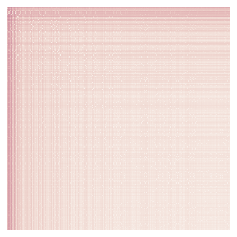

In [9]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
%matplotlib inline

euclidean_dists = metrics.euclidean_distances(X)
sns.heatmap(euclidean_dists, xticklabels=False, yticklabels=False, linewidths=0, square=True,cbar=False)

Next, let's create some time series from the data. Look at the top 100 users with the most question posts. For each user, your time series will be the `CreationDate` of the questions posted by that user. You may want to make multiple time series for each user based on the first tag of the questions. Compare the time series using one of the methods discussed in class. Document your findings. **(30 pts)**

You may find the [pandas.DataFrame.resample module](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) helpful.

Plot the 2 most similar and the 2 most different time series. **(10 pts)**

In [ ]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()